#### Project Type: Тестовое задане на вакансию Data Scientist в Лабораторию функциональной нейрофизиологии
### Project Number: 0010
## Project Title: Тест на скорочтение

---


# **STAGE 1. PROBLEM DEFINITION**
    




### Project Objectives

---

#### Описание проекта 

- Одной из приоритетных задач лаборатории является разработка методов оценки и улучшения функционального состояния человека. 

- В качестве одного из разработанных экспериментов мы изучали влияние специального обучения на то, как человек воспринимает текст на слух в ускоренном режиме. 

- Оценка качества восприятия человеком информации основывалась на тесте, в котором необходимо было ответить на вопросы по прослушанному тексту. 

- Каждое задание состояло из пяти вопросов и, соответственно, человек мог набрать от нуля до пяти баллов за каждое задание.

#### Цель

__Проанализировать зависимости результатов теста от сложности заданий и обучения.__


### Success criteria

---

1. В предположении Y1 = Y2, влияет ли обучение на качество восприятия информации?
1. В предположении Y3 < Y4, влияет ли сложность задания на качество восприятия информации?
1. Допустим, что по итогам анализа процедуры проведения теста выяснилось, что Y1 = Y3, Y2 = Y4, Y1 < Y2. Как можно (и можно ли вообще) использовать результаты второй группы (I-P) для корректировки результатов первой группы (A-J)? Обосновать метод корректировки и провести переоценку результатов первого теста. 

### Termenology

---

- Уровень сложности задания: Y
- Уровенить изменяется по четырем категориям от Y1 до Y4

### Task type

---

- Разведочный анализ данных 
- Проверка статистических гипотез

    
# **STAGE 2. PRELIMINARY DATA WRANGLING**



### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
data_path = r'D:/Data_Science_Project/7. Test task/[0010] Project 1 - Лаборатория функциональной нейрофизиологии'

## SECTION 2.1.  DATA UNDERSTANDING

### _Collect initial data_

---

In [3]:
# Загрузка исходного набора данных:  Данные по обучению
# Перменная teaching_data = Данные по обучению
teaching_data =  pd.read_excel(data_path + '/speedreading_data.xlsx', sheet_name = "Данные по обучению")

# Проверка результата
teaching_data.head()

,Unnamed: 0,До обучения,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,После обучения,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Задание 1,Задание 2,Задание 3,Задание 4,Задание 5,Задание 6,Задание 7,Задание 8,Задание 9,Задание 10
1,A,4,2,4,4,2,3,1,1,3,2
2,B,5,4,5,3,2,4,2,1,2,2
3,C,5,3,3,2,1,5,4,1,3,3
4,D,5,4,4,2,4,5,4,2,3,2


In [4]:
# Загрузка исходного набора данных:  Данные по сложности
# Перменная complexity_data = Данные по сложности
complexity_data =  pd.read_excel(data_path + '/speedreading_data.xlsx', sheet_name = "Данные по сложности")

# Проверка результата
complexity_data.head()

,Unnamed: 0,Легко,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Сложно,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Задание 11,Задание 12,Задание 13,Задание 14,Задание 15,Задание 16,Задание 17,Задание 18,Задание 19,Задание 20
1,I,5,5,5,3,5,3,3,5,4,3
2,J,5,4,5,4,3,4,5,4,3,3
3,K,4,3,5,5,5,5,4,3,4,2
4,L,5,3,4,4,4,5,4,2,4,2


### _Describe data_

---

В таблице __speedreading_data__ приведены данные по двум группам людей, проходившим данный тест:

- Задания 1-5: до обучения, сложность Y1.
- Задания 6-10: после обучения, сложность Y2.
- Задания 11-15: без обучения, сложность Y3.
- Задания 16-20: без обучения, сложность Y4.


Представленная выборка в соответствии с условиями эксперимента представляет собой изменение четырех порядковых предикторов Y1, Y2, Y3, Y4 физический смыл которых указан выше.

Загруженные данные в свою очередь представляют собой два листа таблицы excel.

_Лист 1: Данные по обучению_

- В рассматриваемом листе в первой строке данные разбиты на две группы «До обучения» и «После обучения». 
- Второй строкой предоставлены названия заданий с «Задание 1» до «Задание 10.  

_Лист 2: Данные по сложности_

- В рассматриваемом листе в первой строке данные разбиты на две группы «Легко» и «Сложно». 
- Второй строкой предоставлены названия заданий с «Задание 11» до «Задание 20.  

В обоих листах в столбце Unnamed: 0 представлены названия групп людей в виде заглавных букв латинского алфавита. 


## SECTION 2.2 DATA PREPARATION

### _Renaming_

---

Пропустим первую строку при чтении файла  и приведем название предикторов в соответствие условиям эксперимента.  

#### Данные по обучению

In [5]:
# Пропуск первой строки
teaching_data =  pd.read_excel(data_path + '/speedreading_data.xlsx', sheet_name = "Данные по обучению", header=1)

# Проверка результата
teaching_data.head(2)

,Unnamed: 0,Задание 1,Задание 2,Задание 3,Задание 4,Задание 5,Задание 6,Задание 7,Задание 8,Задание 9,Задание 10
0,A,4,2,4,4,2,3,1,1,3,2
1,B,5,4,5,3,2,4,2,1,2,2


In [6]:
# Список переменных
teaching_data.columns.tolist()

['Unnamed: 0',
 'Задание 1',
 'Задание 2',
 'Задание 3',
 'Задание 4',
 'Задание 5',
 'Задание 6',
 'Задание 7',
 'Задание 8',
 'Задание 9',
 'Задание 10']

In [7]:
# Cловарь переменных
list_of_variables = {'Unnamed: 0' : 'group',
                     'Задание 1' : 'task1_y1',
                     'Задание 2' : 'task2_y1',
                     'Задание 3' : 'task3_y1',
                     'Задание 4' : 'task4_y1',
                     'Задание 5' : 'task5_y1',
                     'Задание 6' : 'task6_y2',
                     'Задание 7' : 'task7_y2',
                     'Задание 8' : 'task8_y2',
                     'Задание 9' : 'task9_y2',
                     'Задание 10' : 'task10_y2'}     

In [8]:
# Переобозначим переменные 
teaching_data = teaching_data.rename(columns = list_of_variables)

# Проверка результата
teaching_data.head()

,group,task1_y1,task2_y1,task3_y1,task4_y1,task5_y1,task6_y2,task7_y2,task8_y2,task9_y2,task10_y2
0,A,4,2,4,4,2,3,1,1,3,2
1,B,5,4,5,3,2,4,2,1,2,2
2,C,5,3,3,2,1,5,4,1,3,3
3,D,5,4,4,2,4,5,4,2,3,2
4,E,5,5,4,3,3,5,3,2,1,1


#### Данные по сложности

In [9]:
# Пропуск первой строки
complexity_data =  pd.read_excel(data_path + '/speedreading_data.xlsx', sheet_name = "Данные по сложности", header=1)

# Проверка результата
complexity_data.head()

,Unnamed: 0,Задание 11,Задание 12,Задание 13,Задание 14,Задание 15,Задание 16,Задание 17,Задание 18,Задание 19,Задание 20
0,I,5,5,5,3,5,3,3,5,4,3
1,J,5,4,5,4,3,4,5,4,3,3
2,K,4,3,5,5,5,5,4,3,4,2
3,L,5,3,4,4,4,5,4,2,4,2
4,M,5,3,5,5,5,4,4,3,3,5


In [10]:
# Список переменных
complexity_data.columns.tolist()

['Unnamed: 0',
 'Задание 11',
 'Задание 12',
 'Задание 13',
 'Задание 14',
 'Задание 15',
 'Задание 16',
 'Задание 17',
 'Задание 18',
 'Задание 19',
 'Задание 20']

In [11]:
# Cловарь переменных
list_of_variables = {'Unnamed: 0' : 'group',
                     'Задание 11' : 'task11_y3',
                     'Задание 12' : 'task12_y3',
                     'Задание 13' : 'task13_y3',
                     'Задание 14' : 'task14_y3',
                     'Задание 15' : 'task15_y3',
                     'Задание 16' : 'task16_y4',
                     'Задание 17' : 'task17_y4',
                     'Задание 18' : 'task18_y4',
                     'Задание 19' : 'task19_y4',
                     'Задание 20' : 'task20_y4'}     

In [12]:
# Переобозначим переменные 
complexity_data = complexity_data.rename(columns = list_of_variables)

# Проверка результата
complexity_data.head()

,group,task11_y3,task12_y3,task13_y3,task14_y3,task15_y3,task16_y4,task17_y4,task18_y4,task19_y4,task20_y4
0,I,5,5,5,3,5,3,3,5,4,3
1,J,5,4,5,4,3,4,5,4,3,3
2,K,4,3,5,5,5,5,4,3,4,2
3,L,5,3,4,4,4,5,4,2,4,2
4,M,5,3,5,5,5,4,4,3,3,5


### _Verify data quality_

---

In [13]:
def verify_data_quality(evaluated_dataset):
    '''
    ФУНКЦИЯ КОМПЛЕКСНОЙ ОЦЕНКИ КАЧЕСТВА ДАННЫХ
    '''
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 50+ '\n')
   
    # Проверка наличия значений NaN
    print("Общее количество пропущенных значений:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 50+ '\n')
    
    evaluated_dataset.isnull().sum().plot(kind='bar')
    # Add a title and show the plot.
    plt.title('Распределение пропущенных значений по столбцам')
    # Create tick mark labels on the Y axis and rotate them.
    plt.xticks(rotation = 90)
    # Create X axis label.
    plt.xlabel("Columns")
    # Create Y axis label.
    plt.ylabel("NaN Values");
    
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 50+ '\n')
    
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 50+ '\n')
    
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 50+ '\n')
   
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 50+ '\n')

Типы данных:
group        object
task1_y1      int64
task2_y1      int64
task3_y1      int64
task4_y1      int64
task5_y1      int64
task6_y2      int64
task7_y2      int64
task8_y2      int64
task9_y2      int64
task10_y2     int64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
110
__________________________________________________

Дублирующих строк:
0
__________________________________________________

Форма нарбора данных:
(10, 11)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=10, step=1)
__________________________________________________



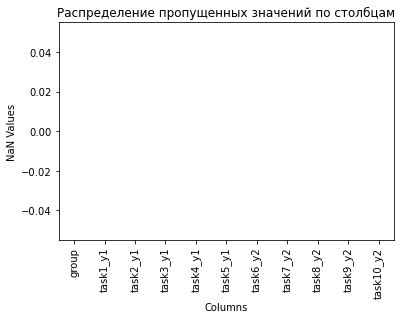

In [14]:
# Оценка качества данных по обучению
verify_data_quality(teaching_data)

Типы данных:
group        object
task11_y3     int64
task12_y3     int64
task13_y3     int64
task14_y3     int64
task15_y3     int64
task16_y4     int64
task17_y4     int64
task18_y4     int64
task19_y4     int64
task20_y4     int64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
88
__________________________________________________

Дублирующих строк:
0
__________________________________________________

Форма нарбора данных:
(8, 11)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=8, step=1)
__________________________________________________



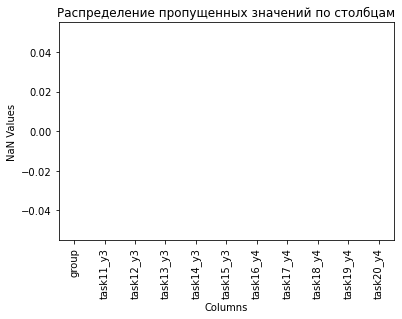

In [15]:
# Оценка качества данных по сложности
verify_data_quality(complexity_data)

### _Sorting, reordering, reindexing_

---

In [16]:
# Выполним переиндексацию по переменной group
teaching_data = teaching_data.set_index(['group'])

complexity_data = complexity_data.set_index(['group'])

In [17]:
# Проверка резльтата 
teaching_data

,task1_y1,task2_y1,task3_y1,task4_y1,task5_y1,task6_y2,task7_y2,task8_y2,task9_y2,task10_y2
group,,,,,,,,,,
A,4,2,4,4,2,3,1,1,3,2
B,5,4,5,3,2,4,2,1,2,2
C,5,3,3,2,1,5,4,1,3,3
D,5,4,4,2,4,5,4,2,3,2
E,5,5,4,3,3,5,3,2,1,1
F,5,3,4,1,1,4,5,2,3,2
G,5,2,4,3,3,3,3,0,4,3
H,5,4,4,3,2,4,2,2,3,3
I,5,2,2,2,2,4,3,3,4,3


In [18]:
# Проверка резльтата 
complexity_data

,task11_y3,task12_y3,task13_y3,task14_y3,task15_y3,task16_y4,task17_y4,task18_y4,task19_y4,task20_y4
group,,,,,,,,,,
I,5,5,5,3,5,3,3,5,4,3
J,5,4,5,4,3,4,5,4,3,3
K,4,3,5,5,5,5,4,3,4,2
L,5,3,4,4,4,5,4,2,4,2
M,5,3,5,5,5,4,4,3,3,5
N,5,4,5,3,5,5,5,1,4,4
O,5,4,3,3,4,4,2,2,4,4
P,5,5,4,5,5,4,5,4,3,3


### _Conclusions_

---

In [22]:
# Сохраниение промежуточны результатов дальнейшего анализа

# Данные по обучению 
pd.DataFrame.to_feather(teaching_data.reset_index(), 'teaching_data.file')


# Данные по сложности
pd.DataFrame.to_feather(complexity_data.reset_index(), 'complexity_data.file')
